# WSL Merge

Merge score data with date and time data

## Imports

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Scores Data

In [197]:
df = pd.read_csv("./data/wsl/avg_scores_all_years.csv", index_col=0).rename(columns={'top_two_waves_total': 'score'})
df.head()


,year,event,round,heat,name,score
0,2008,Quiksilver Pro Gold Coast,Round 2,Heat 1,Andy Irons,16.37
1,2008,Quiksilver Pro Gold Coast,Round 2,Heat 1,Tamaroa McComb,5.90
2,2008,Quiksilver Pro Gold Coast,Round 2,Heat 2,Julian Wilson,14.00
3,2008,Quiksilver Pro Gold Coast,Round 2,Heat 2,Pancho Sullivan,13.23
4,2008,Quiksilver Pro Gold Coast,Round 2,Heat 3,Jeremy Flores,10.83


Look at unique events and find total amoun of heats for the Pipeline events. Event names change with sponsorship changes.

In [198]:
df["event"].unique()


array(['Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach',
       'Billabong Pro Teahupoo', 'Globe Pro Fiji', 'Billabong Pro J-Bay',
       'Rip Curl Pro Search Bali', 'Boost Mobile Pro',
       'Quiksilver Pro France', 'Billabong Pro Mundaka',
       'Hang Loose Santa Catarina Pro', 'Billabong Pipeline Masters',
       'Hurley Pro Trestles', 'Rip Curl Search', 'Santa Catarina Pro',
       'Rip Curl Pro Portugal', 'Billabong Pipe Masters',
       'Billabong Rio Pro', 'Quiksilver Pro New York', 'Volcom Fiji Pro',
       "O'Neill Coldwater Classic Santa Cruz", 'Oakley Pro Bali',
       'Drug Aware Margaret River Pro', 'Fiji Pro', 'J-Bay Open',
       'Billabong Pro Tahiti', 'Hurley Pro at Trestles',
       'Moche Rip Curl Pro Portugal', 'Oi Rio Pro',
       'MEO Rip Curl Pro Portugal', 'Outerknown Fiji Pro',
       'Corona Open J-Bay', 'Corona Bali Protected',
       'Uluwatu CT Margaret River Pro', "Tahiti Pro Teahupo'o",
       'Margaret River Pro',
       'Billabong Pipe Masters 

Locate rows with pipeline events and get the shape of the resulting dataframe. This is the amount of heats in pipeline events with data.

In [199]:
# Make list of pipeline events from previous cell
pipe = [
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pro Pipeline",
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pipe Masters",
    "Billabong Pipeline Masters",
]

df.loc[df["event"].isin(pipe)].shape


(1649, 6)

Check all other events to confirm pipeline has the most data.

In [200]:
df["event"].value_counts().head(15)


Quiksilver Pro Gold Coast        1473
Quiksilver Pro France            1444
Rip Curl Pro Bells Beach         1422
Billabong Pipe Masters           1176
Billabong Pro Teahupoo            729
Hurley Pro Trestles               614
Oi Rio Pro                        574
Billabong Pro J-Bay               493
Hurley Pro at Trestles            472
Billabong Pro Tahiti              472
Billabong Rio Pro                 472
Rip Curl Pro Portugal             472
Drug Aware Margaret River Pro     471
MEO Rip Curl Pro Portugal         456
J-Bay Open                        354
Name: event, dtype: int64

**Pipeline is the event with most data**

Trestles is another good target with data and historical buoy info.

In [201]:
# Cast year data as string to avoid groupby issues
df["year"] = df["year"].astype(str)


### Check and rename rounds and heats for consistency accross events

I've mapped these manually but str methods would reduce the amount of code

In [202]:
# Get unique round names
df["round"].unique()


array(['Round 2', 'Round 1', 'Round 3', 'Round 4', 'Quarterfinal',
       'Semifinal', 'Final', 'Round 5', 'Quarterfinals', 'Semifinals',
       'Trials Quarterfinals', 'Trials Round 1', 'Trials Semifinals',
       'Trials Final', 'Elimination Round', 'Seeding Round',
       'Round of 32', 'Round of 16', 'Opening Round'], dtype=object)

In [203]:
# Map round names to a consistent standard
# Round 1, 2, 3, 4 and 5, then Quarterfinals, Semifinals and Final. Idem for trials
df["round"] = df["round"].map(
    {
        "Seeding Round": "Round 1",
        "Round of 32": "Round 3",
        "Quarterfinal": "Quarterfinals",
        "Round of 16": "Round 4",
        "Elimination Round": "Round 2",
        "Opening Round": "Round 1",
        "Round 1": "Round 1",
        "Round 2": "Round 2",
        "Round 3": "Round 3",
        "Round 4": "Round 4",
        "Round 5": "Round 5",
        "Quarterfinals": "Quarterfinals",
        "Final": "Final",
        "Semifinal": "Semifinals",
        "Semifinals": "Semifinals",
        "Trials Quarterfinals": "Trials Quarterfinals",
        "Trials Round 1": "Trials Round 1",
        "Trials Semifinals": "Trials Semifinals",
        "Trials Final": "Trials Final",
    }
)


In [204]:
# Get unique heat names
df['heat'].unique()

array(['Heat 1 ', 'Heat 2 ', 'Heat 3 ', 'Heat 4 ', 'Heat 5 ', 'Heat 6 ',
       'Heat 7 ', 'Heat 8 ', 'Heat 9 ', 'Heat 10 ', 'Heat 11 ',
       'Heat 12 ', 'Heat 13 ', 'Heat 14 ', 'Heat 15 ', 'Heat 16 ',
       'Heat 8 Watch replay', 'Heat 6 Watch replay',
       'Heat 2 Watch replay', 'Heat 1 Watch replay',
       'Heat 4 Watch replay', 'Heat 10 Watch replay',
       'Heat 11 Watch replay', 'Heat 12 Watch replay',
       'Heat 3 Watch replay', 'Heat 5 Watch replay',
       'Heat 7 Watch replay', 'Heat 9 Watch replay',
       'Heat 13 Watch replay', 'Heat 14 Watch replay',
       'Heat 15 Watch replay', 'Heat 16 Watch replay'], dtype=object)

In [205]:
# Map for consistency and to eliminate 'Watch replay' strings from webscraping
df["heat"] = df["heat"].map(
    {
        "Heat 1 ": "Heat 1",
        "Heat 2 ": "Heat 2",
        "Heat 3 ": "Heat 3",
        "Heat 4 ": "Heat 4",
        "Heat 5 ": "Heat 5",
        "Heat 6 ": "Heat 6",
        "Heat 7 ": "Heat 7",
        "Heat 8 ": "Heat 8",
        "Heat 9 ": "Heat 9",
        "Heat 10 ": "Heat 10",
        "Heat 11 ": "Heat 11",
        "Heat 12 ": "Heat 12",
        "Heat 13 ": "Heat 13",
        "Heat 14 ": "Heat 14",
        "Heat 15 ": "Heat 15",
        "Heat 16 ": "Heat 16",
        "Heat 8 Watch replay": "Heat 8",
        "Heat 6 Watch replay": "Heat 6",
        "Heat 2 Watch replay": "Heat 2",
        "Heat 1 Watch replay": "Heat 1",
        "Heat 4 Watch replay": "Heat 4",
        "Heat 10 Watch replay": "Heat 10",
        "Heat 11 Watch replay": "Heat 11",
        "Heat 12 Watch replay": "Heat 12",
        "Heat 3 Watch replay": "Heat 3",
        "Heat 5 Watch replay": "Heat 5",
        "Heat 7 Watch replay": "Heat 7",
        "Heat 9 Watch replay": "Heat 9",
        "Heat 13 Watch replay": "Heat 13",
        "Heat 14 Watch replay": "Heat 14",
        "Heat 15 Watch replay": "Heat 15",
        "Heat 16 Watch replay": "Heat 16",
    }
)


## Focus on Pipeline data

**Reindex doesn't work as expected**

In [206]:
# Get only pipeline scores
# Uses 'pipe' list from earlier
df_pipe = df.loc[df["event"].isin(pipe)].reindex()
df_pipe


,year,event,round,heat,name,score
0,2008,Billabong Pipeline Masters,Round 2,Heat 1,Kamalei Alexander,11.90
1,2008,Billabong Pipeline Masters,Round 2,Heat 1,Mikael Picon,11.67
2,2008,Billabong Pipeline Masters,Round 2,Heat 2,Evan Valiere,14.57
3,2008,Billabong Pipeline Masters,Round 2,Heat 2,Mick Campbell,14.34
4,2008,Billabong Pipeline Masters,Round 2,Heat 3,Jamie O'Brien,15.00
...,...,...,...,...,...,...
105,2022,Billabong Pro Pipeline,Semifinals,Heat 1,Miguel Pupo,9.50
106,2022,Billabong Pro Pipeline,Semifinals,Heat 2,Seth Moniz,13.50
107,2022,Billabong Pro Pipeline,Semifinals,Heat 2,Caio Ibelli,6.33
108,2022,Billabong Pro Pipeline,Final,Heat 1,Kelly Slater,18.77


## Load event dates data

This data was scraped idependently from scores to avoid using selenium

In [207]:
# Pipeline heat dates scraped from /results endpoint instead of main
event_dates = pd.read_csv("./data/wsl/pipe_masters_heat_dates.csv", index_col=0)
event_dates.head()


,year,event,round,heat,date
0,2008,Billabong Pipeline Masters,Round 1,Heat 1,
1,2008,Billabong Pipeline Masters,Round 1,Heat 2,
2,2008,Billabong Pipeline Masters,Round 1,Heat 3,
3,2008,Billabong Pipeline Masters,Round 1,Heat 4,
4,2008,Billabong Pipeline Masters,Round 1,Heat 5,


### Missing data

Events before 2014 have no heat dates. Have contacted WSL to inquire about getting this data in a structured way.

Other option would be to investigate news articles manually but I'll do that if I have time after project is completed

In [208]:
event_dates["date"].value_counts()


                      330
 December 19, 2014     27
 February 1, 2022      24
 December 16, 2018     24
 December 17, 2017     24
 December 18, 2016     23
 December 17, 2020     22
 December 16, 2015     19
 January 29, 2022      16
 December 11, 2019     16
 December 19, 2016     16
 December 10, 2019     16
 December 12, 2018     15
 December 19, 2019     15
 December 18, 2017     15
 December 12, 2014     12
 December 13, 2018     12
 December 14, 2016     12
 December 9, 2020      12
 December 11, 2015     12
 December 20, 2020     12
 December 10, 2015     12
 December 13, 2014     12
 December 17, 2018     11
 December 11, 2017      9
 December 17, 2015      8
 February 5, 2022       7
 December 16, 2017      3
 December 14, 2020      1
Name: date, dtype: int64

In [209]:
# Sanity check
event_dates[event_dates["year"] == 2022]["round"].value_counts()


Round of 32          16
Opening Round        12
Round of 16           8
Elimination Round     4
Quarterfinals         4
Semifinals            2
Final                 1
Name: round, dtype: int64

### Round and heat names have to be mapped like score data

In [210]:
event_dates["round"].unique()


array(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Quarterfinal',
       'Semifinal', 'Final', 'Round 5', 'Quarterfinals', 'Semifinals',
       'Trials Round 1', 'Trials Quarterfinals', 'Trials Semifinals',
       'Trials Final', 'Seeding Round', 'Elimination Round',
       'Round of 32', 'Round of 16', 'Opening Round'], dtype=object)

In [211]:
df_pipe["round"].unique()


array(['Round 2', 'Round 1', 'Round 3', 'Round 4', 'Quarterfinals',
       'Semifinals', 'Final', 'Round 5', 'Trials Quarterfinals',
       'Trials Round 1', 'Trials Semifinals', 'Trials Final'],
      dtype=object)

In [212]:
event_dates["round"] = event_dates["round"].map(
    {
        "Seeding Round": "Round 1",
        "Round of 32": "Round 3",
        "Quarterfinal": "Quarterfinals",
        "Round of 16": "Round 4",
        "Elimination Round": "Round 2",
        "Opening Round": "Round 1",
        "Round 1": "Round 1",
        "Round 2": "Round 2",
        "Round 3": "Round 3",
        "Round 4": "Round 4",
        "Round 5": "Round 5",
        "Quarterfinals": "Quarterfinals",
        "Final": "Final",
        "Semifinal": "Semifinals",
        "Semifinals": "Semifinals",
        "Trials Quarterfinals": "Trials Quarterfinals",
        "Trials Round 1": "Trials Round 1",
        "Trials Semifinals": "Trials Semifinals",
        "Trials Final": "Trials Final",
    }
)


In [213]:
event_dates["heat"].unique()


array(['Heat 1', 'Heat 2', 'Heat 3', 'Heat 4', 'Heat 5', 'Heat 6',
       'Heat 7', 'Heat 8', 'Heat 9', 'Heat 10', 'Heat 11', 'Heat 12',
       'Heat 13', 'Heat 14', 'Heat 15', 'Heat 16'], dtype=object)

In [214]:
df_pipe["heat"].unique()


array(['Heat 1', 'Heat 2', 'Heat 3', 'Heat 4', 'Heat 5', 'Heat 6',
       'Heat 7', 'Heat 8', 'Heat 9', 'Heat 10', 'Heat 11', 'Heat 12',
       'Heat 13', 'Heat 14', 'Heat 15', 'Heat 16'], dtype=object)

In [215]:
df_pipe["heat"].unique() == event_dates["heat"].unique()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [216]:
df_pipe["round"].unique() == event_dates["round"].unique()


array([False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True])

### Convert dates to datetime

In [217]:
# Check unique values
event_dates["date"].unique()


array([' ', ' December 12, 2014', ' December 13, 2014',
       ' December 19, 2014', ' December 10, 2015', ' December 11, 2015',
       ' December 16, 2015', ' December 17, 2015', ' December 14, 2016',
       ' December 18, 2016', ' December 19, 2016', ' December 11, 2017',
       ' December 16, 2017', ' December 17, 2017', ' December 18, 2017',
       ' December 12, 2018', ' December 13, 2018', ' December 16, 2018',
       ' December 17, 2018', ' December 10, 2019', ' December 11, 2019',
       ' December 19, 2019', ' December 9, 2020', ' December 14, 2020',
       ' December 17, 2020', ' December 20, 2020', ' January 29, 2022',
       ' February 1, 2022', ' February 5, 2022'], dtype=object)

In [218]:
# Eliminate first character blank space
event_dates["date"] = event_dates["date"].str[1:]


Keep only rows with date data

In [219]:
event_dates = event_dates[event_dates["date"] != ""]


In [220]:
event_dates["date"] = pd.to_datetime(event_dates["date"])
event_dates["date"].unique()


array(['2014-12-12T00:00:00.000000000', '2014-12-13T00:00:00.000000000',
       '2014-12-19T00:00:00.000000000', '2015-12-10T00:00:00.000000000',
       '2015-12-11T00:00:00.000000000', '2015-12-16T00:00:00.000000000',
       '2015-12-17T00:00:00.000000000', '2016-12-14T00:00:00.000000000',
       '2016-12-18T00:00:00.000000000', '2016-12-19T00:00:00.000000000',
       '2017-12-11T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2018-12-12T00:00:00.000000000', '2018-12-13T00:00:00.000000000',
       '2018-12-16T00:00:00.000000000', '2018-12-17T00:00:00.000000000',
       '2019-12-10T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
       '2019-12-19T00:00:00.000000000', '2020-12-09T00:00:00.000000000',
       '2020-12-14T00:00:00.000000000', '2020-12-17T00:00:00.000000000',
       '2020-12-20T00:00:00.000000000', '2022-01-29T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-02-05

Save to csv and assign offsets in Excel

In [221]:
event_dates.to_csv("./data/wsl/pipeline_dates.csv")


Read in excel with offsets. This could be accomplished with a .apply function

In [222]:
event_dates_offset = pd.read_csv("./data/wsl/pipeline_dates_offset.csv", index_col=0)
# Convert date column to datetime format
event_dates_offset["date"] = pd.to_datetime(event_dates_offset["date"])
event_dates_offset['year'] = event_dates_offset['year'].astype(str)
event_dates_offset.head()


,year,event,round,heat,date,hour
0,2014,Billabong Pipe Masters,Round 1,Heat 1,2014-12-12,6.0
1,2014,Billabong Pipe Masters,Round 1,Heat 2,2014-12-12,6.5
2,2014,Billabong Pipe Masters,Round 1,Heat 3,2014-12-12,7.0
3,2014,Billabong Pipe Masters,Round 1,Heat 4,2014-12-12,7.5
4,2014,Billabong Pipe Masters,Round 1,Heat 5,2014-12-12,8.0


### Assign estimated times to heats based on dates and 30 minute heat times

In [223]:
# With help from
# https://www.codegrepper.com/code-examples/python/how+to+add+30+minutes+in+datetime+column+in+pandas
event_dates_offset["est_datetime"] = event_dates_offset.apply(
    lambda x: x["date"] + pd.DateOffset(hours=x["hour"]),
    axis=1,
)


In [224]:
event_dates_offset.head()


,year,event,round,heat,date,hour,est_datetime
0,2014,Billabong Pipe Masters,Round 1,Heat 1,2014-12-12,6.0,2014-12-12 06:00:00
1,2014,Billabong Pipe Masters,Round 1,Heat 2,2014-12-12,6.5,2014-12-12 06:30:00
2,2014,Billabong Pipe Masters,Round 1,Heat 3,2014-12-12,7.0,2014-12-12 07:00:00
3,2014,Billabong Pipe Masters,Round 1,Heat 4,2014-12-12,7.5,2014-12-12 07:30:00
4,2014,Billabong Pipe Masters,Round 1,Heat 5,2014-12-12,8.0,2014-12-12 08:00:00


In [225]:
event_dates_offset.tail()

,year,event,round,heat,date,hour,est_datetime
42,2022,Billabong Pro Pipeline,Quarterfinals,Heat 3,2022-02-05,7.0,2022-02-05 07:00:00
43,2022,Billabong Pro Pipeline,Quarterfinals,Heat 4,2022-02-05,7.5,2022-02-05 07:30:00
44,2022,Billabong Pro Pipeline,Semifinals,Heat 1,2022-02-05,8.0,2022-02-05 08:00:00
45,2022,Billabong Pro Pipeline,Semifinals,Heat 2,2022-02-05,8.5,2022-02-05 08:30:00
46,2022,Billabong Pro Pipeline,Final,Heat 1,2022-02-05,9.0,2022-02-05 09:00:00


## Merge scores with times

In [226]:
scores_and_times = df_pipe.merge(
    event_dates_offset,
    left_on=["year", "event", "round", "heat"],
    right_on=["year", "event", "round", "heat"],
).drop(columns=["date", "hour"])
scores_and_times.head(30)


,year,event,round,heat,name,score,est_datetime
0,2014,Billabong Pipe Masters,Round 2,Heat 1,Kelly Slater,14.10,2014-12-13 06:00:00
1,2014,Billabong Pipe Masters,Round 2,Heat 1,Reef McIntosh,7.00,2014-12-13 06:00:00
2,2014,Billabong Pipe Masters,Round 2,Heat 2,Michel Bourez,8.33,2014-12-13 06:30:00
3,2014,Billabong Pipe Masters,Round 2,Heat 2,Makai McNamara,4.57,2014-12-13 06:30:00
4,2014,Billabong Pipe Masters,Round 2,Heat 3,Dusty Payne,4.30,2014-12-13 07:00:00
5,2014,Billabong Pipe Masters,Round 2,Heat 3,Jordy Smith,4.30,2014-12-13 07:00:00
6,2014,Billabong Pipe Masters,Round 2,Heat 4,Nat Young,8.50,2014-12-13 07:30:00
7,2014,Billabong Pipe Masters,Round 2,Heat 4,Mitch Coleborn,4.77,2014-12-13 07:30:00
8,2014,Billabong Pipe Masters,Round 2,Heat 5,Miguel Pupo,7.17,2014-12-13 08:00:00
9,2014,Billabong Pipe Masters,Round 2,Heat 5,Raoni Monteiro,4.13,2014-12-13 08:00:00


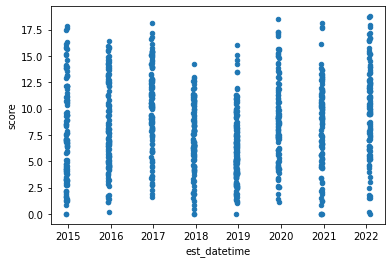

In [229]:
scores_and_times[["score", "est_datetime"]].plot.scatter(
    x="est_datetime", y="score"
);


In [230]:
scores_and_times.groupby('name').mean().sort_values(by='score', ascending=False)

,score
name,
Joao Chianca,15.136667
Jack Robinson,12.028750
John John Florence,12.003636
Barron Mamiya,11.070000
Seth Moniz,10.631429
...,...
Tiago Pires,2.180000
Dion Atkinson,2.070000
Evan Valiere,1.870000


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Trials Round 1'),
  Text(0.0, 0, 'Final'),
  Text(2.0, 0, 'Round 5'),
  Text(4.0, 0, 'Round 3'),
  Text(6.0, 0, 'Round 1'),
  Text(8.0, 0, 'Trials Quarterfinals'),
  Text(10.0, 0, 'Trials Round 1'),
  Text(12.0, 0, '')])

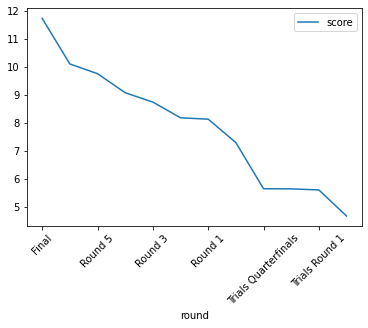

In [232]:
scores_and_times.groupby('round').mean().sort_values(by='score', ascending=False).plot()
plt.xticks(rotation=45)

In [235]:
scores_and_times.groupby(['year', 'round', 'heat']).mean().sort_values(by='score', ascending=False)

score
year round         heat              
2022 Quarterfinals Heat 3   17.300000
     Round 4       Heat 6   17.255000
2016 Round 5       Heat 4   17.135000
2022 Round 4       Heat 1   16.200000
2016 Round 5       Heat 2   16.150000
...                               ...
2018 Round 2       Heat 11   1.735000
2015 Round 1       Heat 11   1.693333
2022 Round 4       Heat 4    1.535000
2017 Round 2       Heat 4    0.000000
2021 Round 2       Heat 1    0.000000

[407 rows x 1 columns]

In [236]:
scores_and_times.shape

(972, 7)

In [237]:
scores_and_times.groupby(by=['year', 'event', 'round', 'heat']).mean()

score
year event                  round         heat          
2014 Billabong Pipe Masters Final         Heat 1   8.185
                            Quarterfinals Heat 1   3.785
                                          Heat 2   5.020
                                          Heat 3   7.970
                                          Heat 4  10.300
...                                                  ...
2022 Billabong Pro Pipeline Round 4       Heat 6  17.255
                                          Heat 7   9.030
                                          Heat 8  11.680
                            Semifinals    Heat 1   9.630
                                          Heat 2   9.915

[407 rows x 1 columns]

In [239]:
scores_cleaned_merged = pd.DataFrame(scores_and_times.groupby(by=['est_datetime']).mean())
scores_cleaned_merged.head()

,score
est_datetime,
2014-12-12 06:00:00,6.440000
2014-12-12 06:30:00,7.266667
2014-12-12 07:00:00,7.223333
2014-12-12 07:30:00,15.180000
2014-12-12 08:00:00,4.786667


In [240]:
scores_cleaned_merged.to_csv('./data/wsl/pipe_2014_2022_clean_dated.csv')

In [241]:
noaa = pd.read_csv('./data/noaa/pipeline_buoy_full_shifted.csv', index_col=0, parse_dates=True)
noaa

,wave_height,dominant_period,avg_period,dominant_wave_direction,water_temp,wave_height_3.0_h,dominant_period_3.0_h,avg_period_3.0_h,dominant_wave_direction_3.0_h,water_temp_3.0_h,...,wave_height_9.0_h,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_9.0_h,water_temp_9.0_h,wave_height_12.0_h,dominant_period_12.0_h,avg_period_12.0_h,dominant_wave_direction_12.0_h,water_temp_12.0_h
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,1.90,12.50,7.87,311,25.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,1.91,12.50,7.45,315,25.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:30:00,1.79,11.76,7.74,319,25.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,1.71,12.50,7.56,315,25.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:30:00,1.63,11.76,7.31,322,25.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14 14:30:00,2.66,9.09,7.33,33,25.1,2.75,9.09,7.60,24.0,25.1,...,1.90,13.33,7.19,339.0,25.1,1.72,13.33,7.07,342.0,25.1
2021-12-14 15:00:00,2.65,9.09,7.52,26,25.0,2.93,9.09,7.42,24.0,25.1,...,2.02,13.33,7.34,354.0,25.1,1.68,15.38,6.98,342.0,25.1
2021-12-14 15:30:00,2.53,9.09,7.33,29,25.1,2.93,9.09,7.62,27.0,25.1,...,2.18,9.09,7.31,16.0,25.1,1.68,13.33,6.91,354.0,25.1


In [243]:
data = noaa.merge(scores_cleaned_merged, left_index=True, right_index=True)
data.head()

,wave_height,dominant_period,avg_period,dominant_wave_direction,water_temp,wave_height_3.0_h,dominant_period_3.0_h,avg_period_3.0_h,dominant_wave_direction_3.0_h,water_temp_3.0_h,...,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_9.0_h,water_temp_9.0_h,wave_height_12.0_h,dominant_period_12.0_h,avg_period_12.0_h,dominant_wave_direction_12.0_h,water_temp_12.0_h,score
2014-12-12 06:00:00,2.98,13.33,10.40,314,25.6,2.74,14.29,9.12,318.0,25.6,...,14.29,10.01,316.0,25.6,3.11,15.38,9.25,314.0,25.6,6.440000
2014-12-12 06:30:00,2.62,14.29,9.95,313,25.6,2.87,15.38,9.91,317.0,25.6,...,13.33,9.36,309.0,25.6,3.32,13.33,9.49,313.0,25.6,7.266667
2014-12-12 07:00:00,2.94,13.33,10.56,314,25.6,2.73,14.29,9.75,317.0,25.6,...,13.33,9.17,318.0,25.6,3.42,15.38,9.64,316.0,25.6,7.223333
2014-12-12 07:30:00,2.80,14.29,10.01,313,25.6,2.81,13.33,9.98,314.0,25.6,...,13.33,10.15,318.0,25.6,3.27,14.29,9.39,310.0,25.6,15.180000
2014-12-12 08:00:00,2.71,13.33,9.84,317,25.6,2.91,14.29,9.83,320.0,25.6,...,13.33,9.24,318.0,25.6,3.51,14.29,9.85,313.0,25.6,4.786667


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2014-12-12 06:00:00 to 2019-12-19 13:00:00
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wave_height                     290 non-null    float64
 1   dominant_period                 290 non-null    float64
 2   avg_period                      290 non-null    float64
 3   dominant_wave_direction         290 non-null    int64  
 4   water_temp                      290 non-null    float64
 5   wave_height_3.0_h               290 non-null    float64
 6   dominant_period_3.0_h           290 non-null    float64
 7   avg_period_3.0_h                290 non-null    float64
 8   dominant_wave_direction_3.0_h   290 non-null    float64
 9   water_temp_3.0_h                290 non-null    float64
 10  wave_height_6.0_h               290 non-null    float64
 11  dominant_period_6.0_h           290 non-null    float64
 12 